In [1]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift,KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering






import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pickle

from collections import Counter

plt.style.use("seaborn")
%matplotlib inline
pd.set_option("display.max_columns", 101)

In [2]:
df = pickle.load(open('model_df5212019.p','rb'))

In [3]:
df.dropna(inplace=True)

In [4]:
list(df.columns)

['speed_10',
 'speed_25',
 'speed_50',
 'speed_75',
 'speed_90',
 'speed_ave',
 'accel_10',
 'accel_25',
 'accel_50',
 'accel_75',
 'accel_90',
 'accel_ave',
 'jerk_10',
 'jerk_25',
 'jerk_50',
 'jerk_75',
 'jerk_90',
 'jerk_ave',
 'bearingRate_10',
 'bearingRate_25',
 'bearingRate_50',
 'bearingRate_75',
 'bearingRate_90',
 'bearingRate_ave',
 'distance_traveled',
 'time_traveled',
 'last_lat',
 'last_long',
 'start_lat',
 'start_long']

In [5]:
df.describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long
count,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000
mean,2.961969,6.262328,11.693931,18.776927,26.148525,17.540547,-1.454210,-0.529265,-0.007714,0.454064,1.175489,-0.663237,-0.913013,-0.279260,0.057574,0.428987,1.131211,0.539352,0.000010,0.000022,0.000057,0.000165,0.000506,0.000519,43.224003,160.029401,39.539860,114.232966,39.549661,114.214217
std,7.894852,12.623735,18.698416,22.447101,27.299409,519.931977,2.113095,1.055437,0.723085,0.743037,1.109082,65.541995,1.774825,1.304997,1.305420,1.632524,2.468977,58.101482,0.000098,0.000138,0.000615,0.001713,0.005270,0.010689,2524.533994,259.064348,2.697841,21.187526,2.687262,21.253270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.538142,-50.400702,-33.508482,-32.213377,-32.213377,-8910.790943,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.876755,1.288557,-149.875858
25%,0.521999,1.879019,3.409207,6.826513,10.645401,6.031333,-1.686905,-0.639139,-0.011650,0.231303,0.685975,-0.122776,-1.154250,-0.380552,0.000067,0.086515,0.239342,-0.004786,0.000001,0.000004,0.000009,0.000022,0.000046,0.000026,1.735986,16.316667,39.960848,116.318378,39.962765,116.317822
50%,1.400397,2.915994,6.639299,13.543171,23.062631,9.710633,-1.184097,-0.448757,-0.000159,0.421672,1.112794,-0.027087,-0.622005,-0.193187,0.005054,0.229621,0.687539,0.002049,0.000002,0.000007,0.000016,0.000036,0.000078,0.000051,6.280549,41.450000,39.978726,116.330986,39.979419,116.330763
75%,2.713326,6.776549,15.377363,26.630187,36.709438,17.574217,-0.757533,-0.247400,0.004579,0.612336,1.469905,0.006319,-0.220621,-0.073944,0.017354,0.447296,1.245468,0.028553,0.000004,0.000011,0.000028,0.000068,0.000152,0.000120,13.957303,189.550000,39.999934,116.419250,39.999388,116.418147
max,482.610772,537.220078,549.333902,601.456748,1304.151605,70737.866388,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,67.568694,67.568694,67.568694,67.568694,75.036253,7906.692124,0.008456,0.008480,0.073101,0.145625,0.369759,1.086125,342823.492292,5806.966667,61.217443,174.510462,61.581517,142.879508


In [6]:
df_local_all=df[(df.time_traveled < 300) & (df.distance_traveled < 100)& (df.speed_90<75)]

In [7]:
df_local_all.describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long
count,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000
mean,2.914273,5.995537,10.953021,17.471638,24.049609,12.673144,-1.511066,-0.555781,-0.007685,0.478710,1.221685,-0.163932,-0.935370,-0.284047,0.067373,0.456315,1.180886,0.117830,0.000011,0.000022,0.000054,0.000155,0.000430,0.000251,7.407537,56.656159,39.646680,114.766588,39.646036,114.767262
std,4.387264,6.810793,10.093949,12.784655,14.695465,9.113183,2.119650,1.108305,0.792345,0.798848,1.127277,1.367040,1.862549,1.403655,1.403684,1.738593,2.599753,1.576396,0.000095,0.000137,0.000641,0.001718,0.003557,0.001417,9.922224,68.048604,2.299966,18.815038,2.301450,18.814596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.536034,-50.400702,-33.508482,-32.213377,-32.213377,-87.739218,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.875950,1.289328,-149.875858
25%,0.699821,2.105998,3.543971,6.920901,10.575552,6.227402,-1.724238,-0.659221,-0.014690,0.260162,0.760308,-0.121445,-1.146844,-0.389486,0.000025,0.100716,0.279522,-0.005907,0.000001,0.000004,0.000009,0.000023,0.000046,0.000025,1.399583,13.483333,39.965595,116.319312,39.965860,116.319360
50%,1.570648,3.112966,7.019844,13.794956,22.922296,9.817297,-1.220391,-0.472054,-0.000205,0.448933,1.152093,-0.026396,-0.644191,-0.207336,0.005498,0.244976,0.710857,0.001953,0.000002,0.000007,0.000016,0.000037,0.000078,0.000048,4.152243,29.891667,39.978138,116.331027,39.978593,116.330833
75%,2.930379,7.026117,15.223040,25.816756,35.609294,17.224850,-0.839420,-0.288928,0.007602,0.629055,1.500327,0.007402,-0.253245,-0.088724,0.019873,0.457023,1.238567,0.028011,0.000004,0.000011,0.000029,0.000070,0.000157,0.000114,9.822639,66.333333,39.996156,116.418596,39.995183,116.417780
max,67.010679,67.826839,70.643548,72.322557,74.509282,189.688274,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,67.568694,67.568694,67.568694,67.568694,75.036253,67.568694,0.008456,0.008480,0.073101,0.145625,0.147444,0.073241,98.792462,299.916667,61.217443,142.879530,61.216963,142.879508


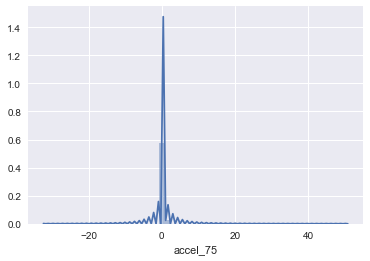

In [10]:
sns.distplot(df_local_all.accel_75)

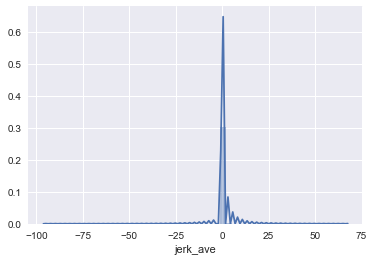

In [11]:
sns.distplot(df_local_all.jerk_ave)

In [8]:
df_local = df_local_all[['speed_90','speed_ave','accel_75','speed_50','accel_ave','distance_traveled','time_traveled']]

In [9]:
X = StandardScaler()
X = X.fit_transform(df_local)

Counter({0: 10681, 1: 4191})
0.438146289117 clusters:2
------
Counter({0: 9199, 1: 3730, 2: 1943})
0.420085989805 clusters:3
------
Counter({1: 9198, 2: 3728, 0: 1935, 3: 11})
0.424108353018 clusters:4
------
Counter({1: 9193, 0: 3730, 4: 1931, 3: 11, 2: 7})
0.426836940553 clusters:5
------
Counter({4: 6893, 1: 4198, 2: 1917, 5: 1846, 0: 11, 3: 7})
0.362830656653 clusters:6
------
Counter({3: 6497, 0: 4041, 1: 2102, 4: 1729, 6: 485, 5: 11, 2: 7})
0.359913722312 clusters:7
------
Counter({0: 5315, 2: 3608, 3: 2525, 7: 1692, 1: 1254, 6: 460, 5: 11, 4: 7})
0.299711870106 clusters:8
------
Counter({1: 5299, 6: 3610, 2: 2534, 5: 1691, 0: 1261, 3: 460, 8: 7, 7: 7, 4: 3})
0.299751414648 clusters:9
------
Counter({0: 5314, 7: 3585, 1: 2507, 2: 1688, 3: 1242, 6: 459, 8: 62, 4: 7, 5: 5, 9: 3})
0.302858345569 clusters:10
------
Counter({0: 5258, 1: 3599, 5: 2331, 9: 1378, 2: 1260, 4: 778, 3: 247, 8: 10, 6: 7, 7: 3, 10: 1})
0.30629532896 clusters:11
------
Counter({0: 4674, 2: 2895, 4: 2193, 11: 1

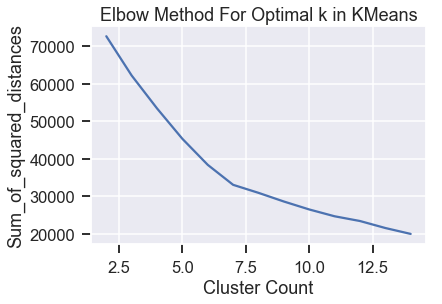

In [30]:
Sum_of_squared_distances = []
scores = []
cluster_count = []
K= range(2,15,1)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X)
    pred =km.predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    scores.append(silhouette_score(X, pred))
    cluster_count.append(i)
    print(Counter(pred))
    print(str(silhouette_score(X, pred)) + ' clusters:' +str(i))
    print('------')





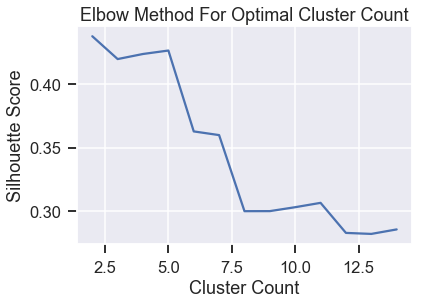

In [31]:
sns.set_context('talk')
sns.lineplot(cluster_count,scores)
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal Cluster Count')
plt.show()

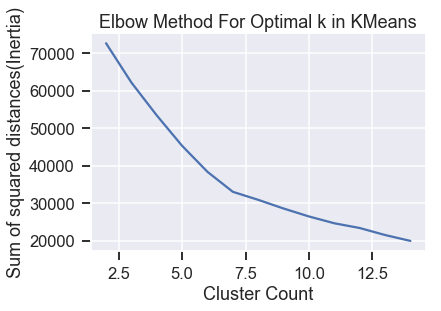

In [32]:
sns.lineplot(K, Sum_of_squared_distances)
plt.xlabel('Cluster Count')
plt.ylabel('Sum of squared distances(Inertia)')
plt.title('Elbow Method For Optimal k in KMeans')
plt.show()

In [ ]:
# scores = []
# EP =[]
# number =[]
# eps= [.001,.005,.01,.05]
# size= [5,10,15,20,25,30,35]
# for ep in eps:
#     for siz in size:
#         db = DBSCAN(eps=ep, min_samples=siz)   
#         pred = db.fit_predict(X)
        
#         print('ep:'+ str(ep) + ' size:'+ str(siz))
#         print(Counter(pred))
#         try:
#             scores.append(silhouette_score(X, pred))
#         except:
#             scores.append(np.nan)
#         EP.append(ep)
#         number.append(siz)



In [ ]:


# links=[]
# score=[]
# clusters=[]
# for linkage in ('ward', 'average', 'complete'):
#     for number in range(3,12,1):
#         clustering = AgglomerativeClustering(linkage=linkage, n_clusters=number)
#         pred = clustering.fit_predict(X)
#         try:
#             print('linkage:' + str(linkage) +' clusters:' +str(number))
#             print(silhouette_score(X,pred))
#             print(Counter(pred))
            
#         except:
#             pass
#         links.append(linkage)
#         score.append(silhouette_score(X,pred))
#         clusters.append(number)



In [12]:
df_local_all['cluster'] = KMeans(n_clusters=6).fit_predict(X)

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_local_all[df_local_all.cluster == 0].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.0
mean,1.694778,3.049481,4.915041,8.469605,12.724858,6.553328,-1.374765,-0.498173,-0.016357,0.400785,1.087396,-0.160542,-0.863156,-0.247109,0.091814,0.469796,1.144918,0.135688,0.000011,0.000020,0.000053,0.000144,0.000352,0.000204,2.329383,27.789932,39.652872,115.175334,39.653182,115.175555,0.0
std,1.542188,1.995548,2.436133,4.435899,6.646230,2.576429,1.600427,0.613927,0.258182,0.369230,0.815106,0.622932,1.302168,0.699615,0.708032,1.158969,2.057368,0.910505,0.000118,0.000156,0.000905,0.002273,0.003772,0.001375,2.418424,27.222427,2.213333,16.071756,2.213201,16.071786,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-51.777575,-21.102781,-10.591342,-10.591342,-10.591342,-18.623233,-19.901413,-10.468021,-10.468021,-10.468021,-10.468021,-10.468021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.875950,1.290415,-149.875858,0.0
25%,0.643621,1.798801,3.109500,4.741189,7.406564,4.327369,-1.618028,-0.614257,-0.019801,0.207507,0.573289,-0.127045,-1.026244,-0.365629,0.001944,0.087661,0.240807,-0.003425,0.000001,0.000004,0.000011,0.000025,0.000045,0.000024,0.716808,9.250000,39.968863,116.313290,39.969583,116.315533,0.0
50%,1.340097,2.506497,4.082997,7.898886,11.139264,6.616593,-1.114465,-0.402241,-0.003200,0.353680,0.999805,-0.026486,-0.654488,-0.192815,0.010882,0.254360,0.721813,0.004091,0.000002,0.000007,0.000017,0.000036,0.000072,0.000041,1.553649,18.366667,39.977923,116.330518,39.977444,116.329233,0.0
75%,2.087996,3.727357,6.688788,10.929621,18.381636,8.480659,-0.665259,-0.222480,0.003823,0.537309,1.382331,0.000317,-0.216119,-0.067665,0.033567,0.459177,1.141685,0.042238,0.000004,0.000011,0.000028,0.000062,0.000126,0.000091,2.928753,36.950000,39.988676,116.386583,39.989972,116.386413,0.0
max,16.642911,16.642911,16.642911,24.056949,33.967091,16.642911,7.022408,7.022408,7.022408,7.022408,8.940599,7.022408,26.016662,26.016662,26.016662,30.412070,40.605800,26.016662,0.008456,0.008480,0.073101,0.145625,0.147444,0.073241,18.850027,157.333333,61.217443,135.748283,61.216963,135.751367,0.0


In [14]:
df_local_all[df_local_all.cluster == 1].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1.846000e+03,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.0
mean,1.074366,2.702692,6.096360,12.612076,20.478767,9.019174,-1.207464,-0.401261,-0.003152,0.349917,0.964947,-0.142484,-0.677798,-0.196075,0.040807,0.311838,0.866527,0.097641,0.000007,0.000018,4.547849e-05,0.000121,0.000414,0.000355,14.018370,203.476129,39.495191,114.250848,39.490167,114.252300,1.0
std,1.293384,2.579383,4.995518,8.554114,11.173769,4.827054,1.593786,0.366892,0.017151,0.209308,0.520202,0.537836,0.762771,0.321752,0.376288,0.771537,1.557185,0.672662,0.000039,0.000067,1.493241e-04,0.000398,0.002392,0.001896,11.898431,55.159830,2.931695,20.698009,2.933094,20.698358,0.0
min,0.000000,0.000000,0.062640,0.349920,1.182242,0.429751,-51.299830,-7.930414,-0.196226,0.002684,0.009023,-13.784337,-5.647277,-2.113120,-0.024730,0.000005,0.000089,-0.985571,0.000000,0.000000,3.552714e-11,0.000004,0.000010,0.000005,0.513961,31.900000,1.339992,-122.141763,1.289328,-122.255148,1.0
25%,0.266400,1.158008,2.790176,5.213870,10.104471,5.263579,-1.491990,-0.529107,-0.008102,0.194181,0.544393,-0.120419,-0.915228,-0.295933,0.000936,0.071737,0.186130,-0.003027,0.000001,0.000004,1.073641e-05,0.000024,0.000049,0.000033,6.094907,157.533333,39.950352,116.312685,39.945239,116.313095,1.0
50%,0.675531,2.046898,4.029291,9.900909,20.634179,8.040517,-1.016983,-0.335970,-0.000687,0.313400,0.935723,-0.024381,-0.480062,-0.126403,0.005157,0.161467,0.535724,0.002072,0.000002,0.000006,1.609274e-05,0.000039,0.000083,0.000063,11.257068,203.750000,39.978749,116.331318,39.976587,116.330296,1.0
75%,1.450369,3.064109,7.478809,18.663866,28.423463,11.803897,-0.598516,-0.198636,0.000171,0.483955,1.299196,0.004449,-0.177166,-0.059502,0.013500,0.358164,0.988042,0.027093,0.000003,0.000009,2.686806e-05,0.000066,0.000148,0.000177,18.354938,249.620833,39.998833,116.417271,39.994485,116.417616,1.0
max,12.735189,20.920456,27.259142,40.566693,72.013045,34.290329,-0.000665,0.004361,0.335529,1.385995,3.452754,1.878400,4.408373,5.844604,9.015227,17.016686,25.024175,13.109564,0.001304,0.001432,2.313537e-03,0.006317,0.064281,0.046704,91.474444,299.916667,50.243243,135.767683,50.300095,135.771867,1.0


In [15]:
df_local_all[df_local_all.cluster == 2].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4.198000e+03,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.0
mean,2.859713,6.441245,13.621362,23.729762,33.647247,16.257222,-1.852034,-0.673638,-0.001534,0.588934,1.457703,-0.163108,-1.055323,-0.313812,0.050818,0.465220,1.332591,0.103105,0.000011,2.388004e-05,0.000060,0.000189,0.000570,0.000283,7.455888,36.449881,39.675081,116.121297,39.677361,116.123309,2.0
std,2.999317,4.611310,6.243280,7.553824,7.279105,4.183492,2.510869,0.875483,0.245958,0.399780,1.024654,0.772586,1.626800,0.717154,0.783493,1.594891,3.052913,1.072594,0.000061,1.191496e-04,0.000266,0.001300,0.004099,0.001367,5.135744,27.851263,2.000014,7.966213,2.000996,7.965870,0.0
min,0.000000,0.037661,0.629998,3.096054,4.836226,7.208725,-55.697911,-20.935705,-8.185023,-3.658045,-1.075030,-13.655120,-33.678029,-15.400700,-7.657211,-6.970112,-6.970112,-9.853886,0.000000,5.826450e-12,0.000001,0.000002,0.000005,0.000003,0.003289,0.000000,1.290813,-122.141984,1.340338,-122.134142,2.0
25%,0.968730,2.841211,9.170256,19.509662,27.829257,12.872600,-1.964547,-0.735411,-0.014940,0.409975,1.044039,-0.145311,-1.258180,-0.386270,-0.001347,0.145315,0.368678,-0.010042,0.000001,4.026900e-06,0.000010,0.000025,0.000056,0.000027,2.975306,14.616667,39.961192,116.325553,39.966566,116.326728,2.0
50%,1.858049,4.879119,13.554421,23.864727,33.077799,15.845349,-1.408843,-0.551714,0.000000,0.566048,1.333807,-0.021745,-0.647841,-0.232681,0.002541,0.246850,0.704636,0.000647,0.000002,6.581846e-06,0.000016,0.000040,0.000093,0.000056,7.086296,31.741667,39.976849,116.333228,39.982015,116.341547,2.0
75%,3.558992,9.127957,18.384374,28.661223,38.942608,19.322004,-1.048572,-0.417927,0.019469,0.709204,1.624877,0.028188,-0.363011,-0.137233,0.012147,0.421827,1.353968,0.020636,0.000004,1.075919e-05,0.000031,0.000084,0.000202,0.000124,10.549280,49.245833,40.007867,116.432563,40.011608,116.431271,2.0
max,22.022125,27.245655,29.302258,47.171593,74.416968,40.664998,6.532163,6.532163,6.532163,6.965885,18.053213,6.532163,10.006339,13.839421,20.546732,54.780507,75.036253,31.455117,0.001942,4.520300e-03,0.008817,0.070615,0.126804,0.052833,32.108713,185.416667,47.672698,126.414643,47.670495,126.562443,2.0


In [16]:
df_local_all[df_local_all.cluster == 3].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1.917000e+03,1.917000e+03,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.0
mean,9.112952,18.720288,31.457755,40.783342,47.152731,29.964850,-1.509525,-0.634966,-0.006927,0.602492,1.388659,-0.079002,-1.204403,-0.455413,0.023462,0.498179,1.248675,0.024882,9.813604e-06,2.129466e-05,0.000053,0.000144,0.000399,0.000234,19.238656,63.554530,39.709936,110.818602,39.703729,110.817174,3.0
std,8.330048,9.261327,8.187685,7.433141,8.203778,6.483514,1.140637,0.633365,0.329686,0.386017,0.883469,0.663516,1.575464,0.675878,0.390515,0.789920,1.494706,0.430705,6.844924e-05,1.239284e-04,0.000247,0.000666,0.002065,0.001067,16.544191,62.397035,2.514874,35.304129,2.522333,35.301902,0.0
min,0.000000,0.496799,2.747057,3.104684,3.445753,16.515762,-22.210037,-15.132419,-7.277609,-3.701076,-3.701076,-18.661477,-29.414839,-13.873970,-1.680254,-0.879092,-0.398395,-4.003637,0.000000e+00,3.019807e-11,0.000002,0.000002,0.000007,0.000003,0.008957,0.000000,18.254485,-122.298802,18.413318,-122.296952,3.0
25%,2.559605,12.490554,26.497852,35.858709,41.810311,25.672102,-1.737505,-0.741355,-0.006908,0.451841,1.031736,-0.089813,-1.747740,-0.677365,-0.004348,0.112337,0.296342,-0.012339,1.342832e-07,2.215425e-06,0.000005,0.000011,0.000029,0.000015,8.780818,19.816667,39.934999,116.309370,39.923427,116.303820,3.0
50%,6.934316,18.550912,30.308603,39.941915,45.089876,28.865370,-1.290456,-0.562008,0.000305,0.582920,1.281377,-0.037510,-0.910450,-0.395723,0.000192,0.382201,0.907539,-0.001470,1.344178e-06,4.023733e-06,0.000009,0.000022,0.000054,0.000045,13.718068,39.900000,39.984950,116.332915,39.980087,116.331710,3.0
75%,13.509027,24.351868,36.322100,44.228900,50.877227,32.679274,-1.029917,-0.437538,0.018022,0.718901,1.583660,0.013929,-0.286972,-0.121793,0.005777,0.686053,1.763294,0.008682,4.429577e-06,1.241086e-05,0.000034,0.000088,0.000197,0.000128,24.013157,85.133333,40.030968,116.448546,40.013822,116.419655,3.0
max,67.010679,67.826839,70.643548,72.322557,74.509282,78.650970,3.235476,3.242761,4.730400,7.782686,17.421519,4.159924,10.072709,10.072709,10.072709,12.993845,18.296574,10.072709,1.905764e-03,4.072233e-03,0.006871,0.013731,0.051384,0.025469,98.792462,299.016667,51.410210,142.879530,51.260097,142.879508,3.0


In [17]:
df_local_all[df_local_all.cluster == 4].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,13.422603,15.425563,19.082211,24.260899,27.286605,20.127327,17.403216,19.434414,22.662671,24.595307,25.805815,21.786891,-28.316268,-28.165452,-27.782498,-23.862957,-21.557699,-25.415749,0.000768,0.000779,0.000797,0.000807,0.000813,0.000792,0.017965,0.019048,39.959666,116.342843,39.959745,116.342919,4.0
std,13.940629,14.811723,18.293653,24.255709,28.429641,18.828049,21.138227,17.373605,12.920214,12.254415,12.742349,13.789528,31.322413,31.473750,31.878404,35.183228,38.064465,33.596381,0.001131,0.001130,0.001130,0.001131,0.001131,0.001130,0.024886,0.033923,0.046581,0.065751,0.046485,0.065698,0.0
min,0.820798,0.820798,0.820798,0.820798,0.820798,0.820798,-21.454727,-8.386397,13.394154,14.196066,14.196066,7.516365,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000228,0.000000,39.860120,116.257612,39.860467,116.257990,4.0
25%,4.088769,5.529596,5.529596,5.529596,5.529596,5.529596,14.756156,14.756156,14.756156,18.168770,18.516390,14.756156,-27.202402,-27.202402,-27.202402,-27.202402,-27.202402,-27.202402,0.000128,0.000129,0.000130,0.000131,0.000132,0.000130,0.001536,0.000000,39.958193,116.305490,39.958193,116.305490,4.0
50%,9.273580,12.171681,12.171681,12.171681,12.171681,12.171681,18.489406,19.639460,20.456715,22.080542,22.080542,20.204040,-17.095612,-17.095612,-17.095612,-17.095612,-17.095612,-17.095612,0.000280,0.000280,0.000280,0.000280,0.000280,0.000280,0.003381,0.000000,39.971652,116.325032,39.971652,116.325032,4.0
75%,17.913432,22.033914,31.186330,41.231937,47.259301,34.524799,22.299223,22.299223,22.299223,24.437963,28.327123,22.299223,-14.639524,-14.619790,-14.586899,-4.720999,-4.042304,-6.398041,0.000812,0.000849,0.000910,0.000944,0.000965,0.000892,0.032086,0.025000,39.986635,116.381962,39.986635,116.382036,4.0
max,39.859441,39.859441,47.151145,63.310750,72.435960,47.790021,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,-1.224148,-0.207906,2.406994,10.111977,24.891391,2.596521,0.003214,0.003214,0.003214,0.003214,0.003214,0.003214,0.054904,0.083333,39.996231,116.442357,39.996441,116.442357,4.0


In [18]:
df_local_all[df_local_all.cluster == 5].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,9.738318,11.024532,12.682637,18.752652,28.691901,74.744578,-20.050953,-16.529773,-12.240583,-8.061412,-6.359101,-34.971152,20.674912,20.772280,20.902670,21.036365,21.234937,30.381117,4.428107e-05,0.000069,0.000182,0.000882,0.004195,0.002692,4.554232,51.518182,39.127539,115.198775,39.116459,115.209137,5.0
std,18.525166,17.949053,17.218206,15.609230,16.560612,61.227257,24.019826,19.704648,14.724338,12.593394,12.437042,18.381019,25.173180,25.209970,25.305612,25.404949,25.360822,19.471711,5.955186e-05,0.000067,0.000197,0.001468,0.007210,0.002864,4.167191,78.302096,2.854834,3.695613,2.850684,3.698984,0.0
min,0.772396,2.049736,2.666252,3.078190,3.468157,6.201606,-60.536034,-50.400702,-33.508482,-32.213377,-32.213377,-87.739218,-0.129873,-0.013791,-0.000273,0.001560,0.007630,5.183406,3.666401e-13,0.000002,0.000007,0.000016,0.000027,0.000013,0.010100,0.000000,30.522487,104.056324,30.522487,104.056324,5.0
25%,1.357560,2.574656,3.658881,9.093606,16.999779,24.195794,-33.415637,-31.088403,-24.891293,-13.014645,-5.038725,-35.415781,-0.015434,-0.002270,0.000159,0.004645,0.131711,13.638728,1.007151e-05,0.000025,0.000030,0.000051,0.000110,0.000048,0.247636,1.850000,39.930850,116.305258,39.975350,116.313296,5.0
50%,1.520147,3.035773,5.522728,13.851952,34.555708,63.459823,-2.974206,-0.286921,-0.014322,0.014297,0.044480,-29.963429,-0.004180,-0.001055,0.002133,0.037343,0.807749,37.584847,2.242176e-05,0.000047,0.000134,0.000202,0.000381,0.002695,6.567418,30.283333,39.977510,116.316062,39.976100,116.329633,5.0
75%,2.709197,5.216522,8.582786,22.455353,37.384839,110.509595,-0.488967,-0.068203,-0.005358,0.043461,0.319790,-25.863650,38.180744,38.235524,38.939258,39.642993,40.065233,41.241042,4.580116e-05,0.000084,0.000233,0.000901,0.005839,0.004946,8.152576,41.550000,40.033100,116.327983,39.977532,116.331187,5.0
max,55.901173,55.901173,55.901173,55.901173,55.901173,189.688274,-0.054224,-0.017942,0.001896,0.091226,0.770143,-19.107209,67.568694,67.568694,67.568694,67.568694,67.568694,67.568694,1.961015e-04,0.000196,0.000638,0.004786,0.022643,0.007168,9.279166,226.866667,40.077017,116.333150,40.076083,116.333450,5.0


In [19]:
df_local_all[df_local_all.cluster == 6].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_local_all[df_local_all.cluster == 7].describe()

In [ ]:
df_local['cluster'] = AgglomerativeClustering(linkage='ward', n_clusters=3).fit_predict(X)

In [20]:
df_local_all.to_csv('df_local_all.csv')

In [33]:
pickle.dump(df_local_all,open('df_local_all.p','wb'))